# PART 5 Project: Ford GoBikes Analysis
## by Youngsik Son

## Data Wrangling

> - This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
<br/>
> - The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. Dataset used here is for 2019-02 only.
<br/>
> - Each trip is anonymized and includes: Trip Duration (seconds)/ Start Time and Date/ End Time and Date/ Start Station ID/ Start Station Name/ Start Station Latitude/ Start Station Longitude/ End Station ID/ End Station Name/ End Station Latitude/ End Station Longitude/ Bike ID/ User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Accessing

In [3]:
## Accessing visually
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
75942,1051,2019-02-19 08:33:39.8880,2019-02-19 08:51:11.2920,73.0,Pierce St at Haight St,37.771793,-122.433708,14.0,Clay St at Battery St,37.795001,-122.399970,4397,Subscriber,1996.0,Male,No
8768,383,2019-02-28 08:07:50.1210,2019-02-28 08:14:14.1200,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,50.0,2nd St at Townsend St,37.780526,-122.390288,5960,Subscriber,1987.0,Male,No
87692,1028,2019-02-16 23:26:35.2410,2019-02-16 23:43:43.6250,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,145.0,29th St at Church St,37.743684,-122.426806,5951,Subscriber,1998.0,Male,No
77990,968,2019-02-18 21:34:53.8350,2019-02-18 21:51:02.0010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,6113,Subscriber,1997.0,Female,No
180127,828,2019-02-01 11:49:30.2830,2019-02-01 12:03:18.7180,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,16.0,Steuart St at Market St,37.794130,-122.394430,4761,Subscriber,1988.0,Female,No
173019,569,2019-02-03 13:47:14.3600,2019-02-03 13:56:43.6800,60.0,8th St at Ringold St,37.774520,-122.409449,24.0,Spear St at Folsom St,37.789677,-122.390428,5412,Subscriber,NaN,NaN,No
60506,538,2019-02-20 18:32:49.9770,2019-02-20 18:41:48.5100,77.0,11th St at Natoma St,37.773507,-122.416040,369.0,Hyde St at Post St,37.787349,-122.416651,5377,Subscriber,1986.0,Female,No
122565,588,2019-02-11 11:23:40.4400,2019-02-11 11:33:28.5420,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,198.0,Snow Park,37.807813,-122.264496,1001,Customer,1982.0,Female,No
51835,789,2019-02-21 17:38:27.6200,2019-02-21 17:51:37.0010,89.0,Division St at Potrero Ave,37.769218,-122.407646,119.0,18th St at Noe St,37.761047,-122.432642,6322,Subscriber,1991.0,Male,No
4449,821,2019-02-28 15:47:41.5110,2019-02-28 16:01:23.3980,104.0,4th St at 16th St,37.767045,-122.390833,345.0,Hubbell St at 16th St,37.766483,-122.398279,4817,Subscriber,NaN,NaN,No


In [5]:
## Accessing Programmatically 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
## Descriptive Statistics 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Number of unique values
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
# Number of Null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
## Number of Duplicates values
df.duplicated().sum()

0

In [10]:
## Count of each user_type value
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
## Count of Members' Gender
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

#### Accessment Note
##### Quality
1. 'start_station_id', 'end_station_id ', and 'bike_id' should be in string data type.
<br/>
2. 'start_time' and 'end_time' should be in dateTime data type.
<br/>
3. 'member_birth_year' should be in integer data type.
<br/>
4. 'station_id', 'station_name', 'member_birth_year' and 'member_gender' columns have missing values.

##### Tidy
There are no tidy issues

### Cleaning

In [13]:
df_clean = df.copy()

#### Define
'station_id', 'station_name', 'member_birth_year' and 'member_gender' columns have missing values.

Drop any rows that are missing 'station_id'
<br/>
Fill up any missing 'member_birth_year' values with 0
<br/>
Fill up any missing 'member_gender' values with 'NA'

#### Code

In [14]:
df_clean.dropna(subset = ["start_station_id"], inplace = True)

In [15]:
df_clean.member_birth_year.fillna(0, inplace = True)
df_clean.member_gender.fillna("Not Defined", inplace = True)

#### Test

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        183215 non-null  float64
 14  memb

#### Define
<br/>
'start_station_id', 'end_station_id ', and 'bike_id' should be in string data type.

Convert 'start_station_id', 'end_station_id ', and 'bike_id' data type to string

#### Code

In [17]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

#### Test

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  object 
 12  user_type                183215 non-null  object 
 13  member_birth_year        183215 non-null  float64
 14  memb

#### Define
<br/>
'start_time' and 'end_time' should be in dateTime data type.

Convert 'start_time' and 'end_time' data type to dateTime

#### Code

In [19]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

#### Define
<br/>
'member_birth_year' should be in integer data type.

Convert 'member_birth_year' data type to integer

#### Code

In [21]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int, errors='ignore')

#### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

#### Define
<br/>
Extract month, days of the week and hours from 'start_time'
<br/>
Convert start_time_hours to integer data type

#### Code

In [23]:
#extract weekday name and hours from start_time
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a');
df_clean['start_time_hour'] = df_clean['start_time'].dt.strftime('%H');
df_clean['start_time_hour']

0         17
1         18
2         12
3         17
4         23
          ..
183407    00
183408    00
183409    00
183410    00
183411    00
Name: start_time_hour, Length: 183215, dtype: object

In [24]:
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype(int)

#### Test

In [25]:
df_clean['start_time_day'].value_counts()

Thu    35176
Tue    31781
Wed    29609
Fri    28962
Mon    26807
Sun    15503
Sat    15377
Name: start_time_day, dtype: int64

### Storing Data

In [26]:
df_clean.to_csv('ford_gobike_master.csv', index = False)

## Data Exploration

### What is the structure of your dataset?

> The dataset contains 183215 rows after cleaning with 16 features: <br/>
    **duration_sec**            (integer)<br/>
    **start_time**              (dateTime) <br/>
    **start_station_id**        (string) <br/>
    **start_station_name**      (string) <br/>
    **start_station_latitude**  (float) <br/>
    **start_station_longitude** (float) <br/>
    **end_station_id**          (string) <br/>
    **end_station_name**        (string) <br/>
    **end_station_latitude**    (float) <br/>
    **end_station_longitude**   (float) <br/>
    **bike_id**                 (string) <br/>
    **user_type**               (string) <br/>
    **member_birth_year**       (integer) <br/>
    **member_gender**           (string) <br/>
    **bike_share_for_all_trip** (string) <br/>

### What is/are the main feature(s) of interest in your dataset?

> My main interest is to find the characteristics of the group of people who are the most likely to use the bike service. This will help the business to choose the target market.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Plotting the relationship plots or visualizations on 'user_type', 'member_birth_year', 'member_gender' with 'duration_sec' will help in our investigation.

## Univariate Exploration

In [27]:
# Setting the base color
base_color= sb.color_palette()[0]

### Bike rides on the days of the week

Text(-9.075000000000003, 0.5, 'Counts')

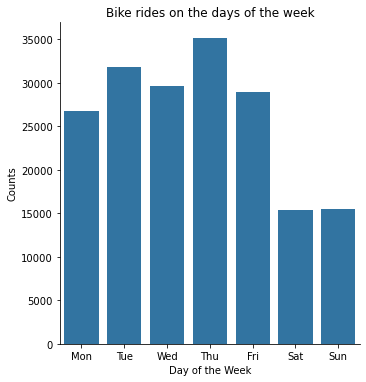

In [28]:
# Weekday Order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Count plot of the Bike rides on the days of the week
sb.catplot(data=df_clean, x='start_time_day', kind='count', order=weekday, color = base_color)
plt.title("Bike rides on the days of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Counts")

> - Thursday has the highest number of bike trips.
<br/>
> - The number of bike trips are higher on the weekdays than on the weekends. The usage drops significantly on the weekends.

### Bike rides on the start time hours

Text(0, 0.5, 'Counts')

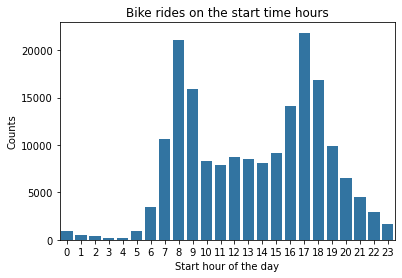

In [29]:
# Count plot of the Start Time Hour of the Bike rides
sb.countplot(data=df_clean , x='start_time_hour', color=base_color);
plt.title("Bike rides on the start time hours")
plt.xlabel("Start hour of the day")
plt.ylabel("Counts")

> - The number of bike rides peak at between in the morning from 8-9am and in the afternoon from 5-6 pm.
<br/>

### User Type Distribution

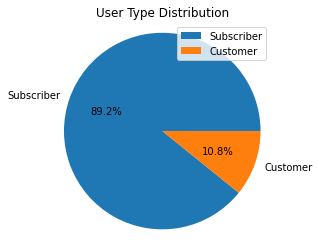

In [30]:
# Value counts for user types
type_counts = df_clean.user_type.value_counts()

# Pie Distribution of the User Type
plt.pie(type_counts, labels = type_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title("User Type Distribution")
plt.axis('square');

> - We have dominent 89.2% of the bike trips used by subscribers, wheras only 10.8% of the bike trips were used by casual customers. 
<br/>

### Gender Distribution

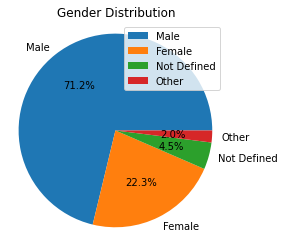

In [31]:
# Value counts for Gender
gender_counts = df_clean.member_gender.value_counts()

# Pie Distribution of the Gender
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title("Gender Distribution")
plt.axis('square');

> - The number of bike rides were done much more by males with 71.2% than females with 22.3%.
<br/>

### Trip Duration Distribution

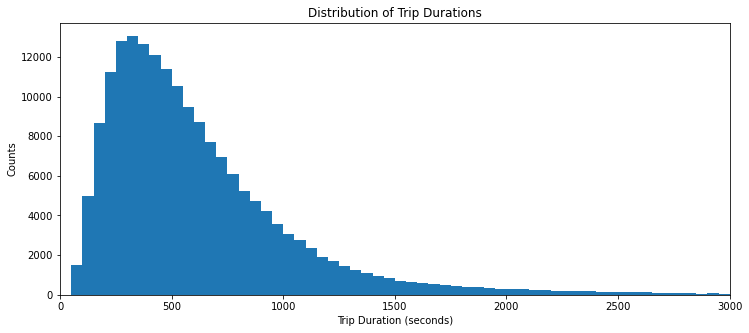

In [32]:
# Get the ticks for bins between [0 - maximum weight]
binsize = 50
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
# Limit the x-axis to 3000
plt.xlim(0, 3000)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Counts')
plt.title('Distribution of Trip Durations');

> - We have limited the x axis up to 3000 seconds to zoom into the area where the most data lies in the distribution.
<br/>
> - We can convert the unit of time from seconds to minutes so it is more convenient to measure.

In [33]:
# Calculate duration time in miniutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [34]:
df_clean['duration_min'].describe()

count    183215.000000
mean         12.098367
std          29.917978
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

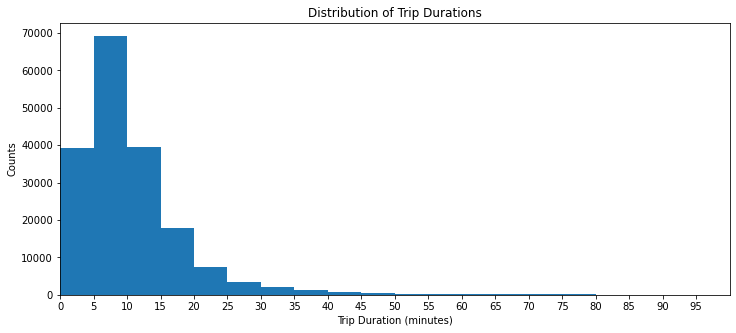

In [35]:
# Get the ticks for bins between [0 - maximum weight]
binsize = 5
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
# Apply x-ticks
plt.xticks(ticks = [x for x in range(0,100,5)])
plt.xlim(0, 100)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Counts')
plt.title('Distribution of Trip Durations');

> - We can see that the highest number of the bike rides fall under the range of 5 to 10 minutes.
<br/>
> - Since the distribution is right-skewed with a very long tail, let's apply a log transform to the data. 
<br/>

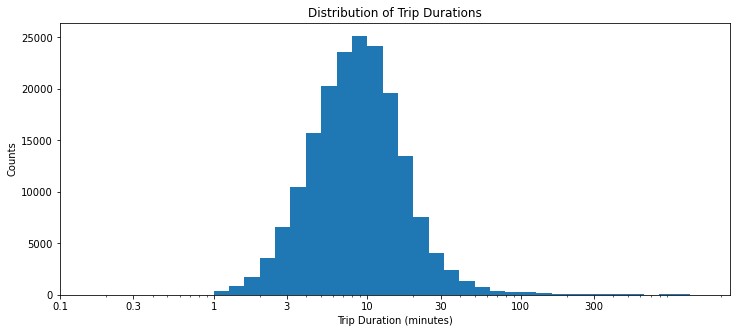

In [36]:
# Log scaled Distribution
# Setting new bins for Log scaled Dist.
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+0.1, 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[12, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
# Log scaled applied
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Counts')
plt.title('Distribution of Trip Durations');

> - After applying a logarithmic transform to the data, we can see the average duration time of bike trips is at around 10 minutes. 

### Age Distribution

In [37]:
# Age calculation
df_clean['age'] = 2019 - df_clean['member_birth_year']

In [38]:
df_clean['age']

0           35
1         2019
2           47
3           30
4           45
          ... 
183407      23
183408      35
183409      29
183410      31
183411      30
Name: age, Length: 183215, dtype: int64

In [39]:
# Saving the new columns into the csv file
df_clean.to_csv('ford_gobike_master.csv', index = False)

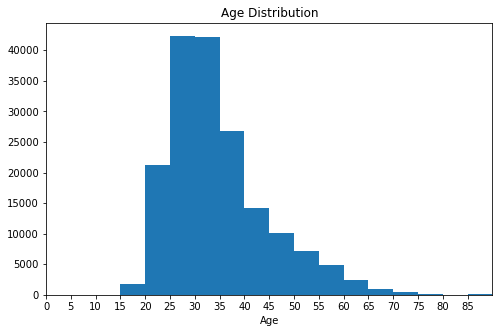

In [40]:
binsize = 5
bins = np.arange(0, df_clean['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'age', bins = bins)
# Apply x-ticks
plt.xticks(ticks = [x for x in range(0,90,5)])
# Limit the x-axis to 90 since there are invalid ages
plt.xlim(0, 90)
plt.xlabel('Age')
plt.title('Age Distribution');

> - We have highest number of bike trips made by users with ages between 25 to 35. The bike trips are mostly used by young adults.
<br/>
> - The distribution is right tail and as the age goes up, the number of trips go down.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration distribution was higly right-skewed with a very long tail. After applying the log transformation, we could see the normal distribution with a mean of around 10.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some invalid values for the age of the users. For example, there are rows with member_birth_year equals to 0 which makes the age to 2019 after the calcualtion. Since these are invalid values for age, we have limited the range of the x-axis (age) in between 0 to 90. 

## Bivariate Exploration


### Trip duration time by differnt user types

Text(0, 0.5, 'Trip Duration (minutes)')

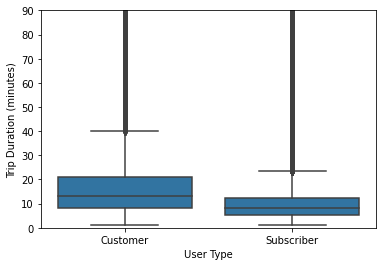

In [41]:
# Boxplot between the user_type and duration_min
sb.boxplot(data=df_clean, x='user_type', y='duration_min', color=base_color)
# Limit the y-axis to 60 to have closer look of the plot
plt.ylim(0, 60)
# Apply y-ticks up to 100
plt.yticks(ticks = [x for x in range(0,100,10)])
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')

> - There are many outliers in the plots so we have zoomed in the y axis (Duration) less than an hour that we can see the box plots more clearly.
<br/>
> - We have both the mean and max values in the Customer greater than the Subscriber's. This could be due to various reasons. For example, subscribers would be using the bikes more regular basis commuting to work. On the other hand, casual customers may use them for one off incidnet such as being tourists in the city.
<br/>
> - Since the subscribers are likely to use bikes to commute to work, we can investigate the relationship between the days of the week used and the duration time.

### Weekly trip duration time

Text(0, 0.5, 'Trip Duration (minutes)')

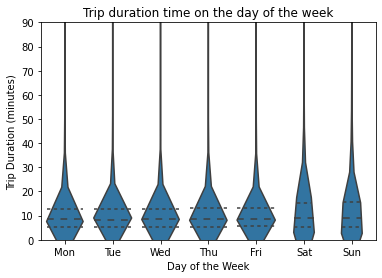

In [42]:
# Violoin plot between start_time_day and duration_min
sb.violinplot(data=df_clean, x='start_time_day', y='duration_min', order=weekday, color = base_color, inner='quartile')
# Limit the y-axis up to 40
plt.ylim(0, 40)
plt.yticks(ticks = [x for x in range(0,100,10)])
plt.title("Trip duration time on the day of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Trip Duration (minutes)")

> - It is interesting to see that the plot patterns on the weekdays look almost identical. It also goes the same to the plots on the weekends. 
<br/>
> - There are clear differences between the plots on the weekdays and the ones on the weekends. The plots on the weekdays are wider and have shorter upper adjacent value.
<br/>

### Weekly number of the bike rides by different user types

Text(0, 0.5, 'Count')

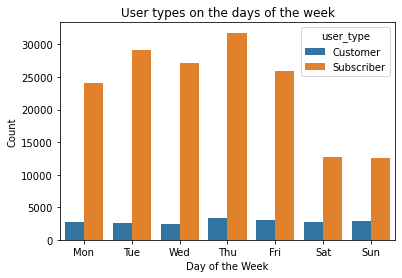

In [43]:
# Clusterd Bar Chart between start_time_day and user_type
sb.countplot(data = df_clean, x = 'start_time_day', order=weekday, hue = 'user_type')

plt.title("User types on the days of the week")

plt.xlabel("Day of the Week")
plt.ylabel("Count")

> - We have almost the same numbers of the bike trips every day for Customer. However, we have different result for Subscriber. On the weekdays we have average number of bike trips for subsrciber of around 25000 but it drops down to around 13000 on the Weekends. This clearly indicates us that subscribers are likely to use bike trips to commute to their work, school or somewhere they can go on regular basis on weekdays.
<br/>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Customer bike riders are likely to use the service for the longer duration time than the Subscriber bike riders.
<br/>
> - Trip duration time on the weekdays have similar pattern duration time, but the average duration time on the weekends are longer than the time on the weekdays.
<br/>
> - Subscribers use more bike ride services on the weekdays than on the weekends. On the other hand, the number of the bike trips for the customers have the same pattern thoughout the whole week.


## Multivariate Exploration

### Weekly trends of duration time by different user types

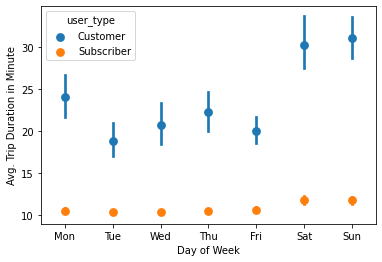

In [44]:
# Point plot between start_time_day, duration_min and user_type
sb.pointplot(data=df_clean, x='start_time_day', y='duration_min', hue='user_type', order=weekday, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> - The above pointplot highlights that Customers normally have longer trip duration times than the Subscribers both on the weekdays and the weekends. 
> - Duration times for both user types increase on the weekends. The average trip durations for Subscribers only increased about 2 minutes whereas the trip durations for Customers increased more than 5 minutes on the weekends.


### Weekly trends of start time hour by different user types

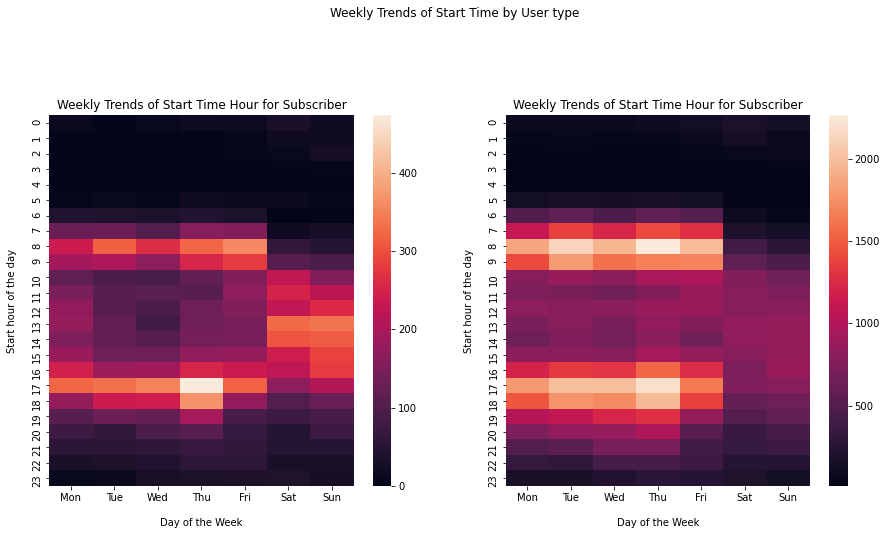

In [47]:
#Create the list in the order for the weekdays
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#Using Categorical() function to set the order as the above
df_clean['start_time_day'] = pd.Categorical(df_clean['start_time_day'], categories=days, ordered=True)

plt.figure(figsize=[15, 15]);
plt.suptitle('Weekly Trends of Start Time by User type')

#Ford GoBikes Customer 
plt.subplot(2, 2, 1)
df_customer = df_clean.query('user_type=="Customer"')
customer_pivot = pd.pivot_table(df_customer, index="start_time_hour", columns="start_time_day", values="bike_id",aggfunc=lambda x: x.value_counts().count(), fill_value=0)
sb.heatmap(customer_pivot)
plt.title("Weekly Trends of Start Time Hour for Subscriber")
plt.xlabel('Day of the Week', labelpad = 15)
plt.ylabel('Start hour of the day', labelpad = 15);

#Ford GoBikes Subscriber 
plt.subplot(2, 2, 2)
df_subscriber = df_clean.query('user_type=="Subscriber"')
subscriber_pivot = pd.pivot_table(df_subscriber, index="start_time_hour", columns="start_time_day", values="bike_id",aggfunc=lambda x: x.value_counts().count(), fill_value=0)
sb.heatmap(subscriber_pivot)
plt.title("Weekly Trends of Start Time Hour for Subscriber")
plt.xlabel('Day of the Week', labelpad = 15)
plt.ylabel('Start hour of the day', labelpad = 15);
plt.show()


> - The above heat map highlights that Customers mainly use the service on the weekends, while subscribers normally ride bikes on the weekdays around 8-9am and 4-6pm.
<br/>
> - On the weekends, the number of the bike trips drop significantlly for the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Customers normally have longer trip duration times than the Subscribers both on the weekdays and the weekends. Duration times for both user types increase on the weekends. While the average trip durations for Subscribers  increased about 2 minutes, the trip durations for Customers increased more than 5 minutes on the weekends.
<br/>
> - Customers mainly use the service on the weekends, while subscribers normally ride bikes on the weekdays around 8-9am and 4-6pm. This strengthens our idea that subscribers are likely to use bike rides to commute to their work, school or somewhere they can go on regular basis on weekdays.
